In [0]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/CVproject/
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/CVproject
/content/drive/My Drive/CVproject


(448, 724)
img size:  (448, 724, 3)
img type:  uint8


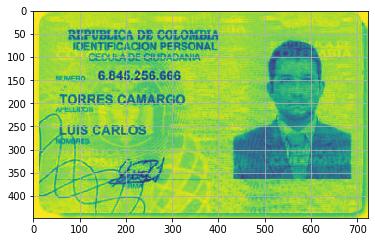

In [152]:
I = cv.imread("data/Cedula1.jpg", 1) #lea la imagen en numpy array
I2 = cv.cvtColor(I, cv.COLOR_BGR2RGB) #pasela de bgr a rgb
I3 = cv.cvtColor(I2, cv.COLOR_RGB2GRAY) #pasela de rgb a gray
print(I3.shape)
plt.imshow(I3); #mostrar la imagen
plt.grid() # dibuje rejilla
print("img size: ", I2.shape)
print ("img type: ", I2.dtype)
#plt.scatter(50,100, marker="x", s=200, linewidth=5, c="b")

TypeError: ignored

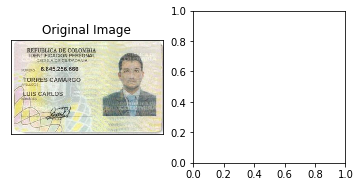

In [138]:
img = cv.imread("data/Cedula1.jpeg")
#img = img.resize(100,100)
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(I2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

(25, 180)

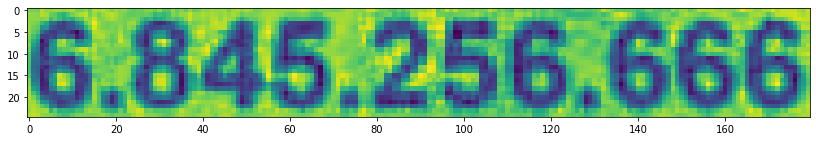

In [153]:
crop_img = I3[128:153, 140:320]
plt.figure(figsize = (20,2))
plt.imshow(crop_img)
crop_img.shape

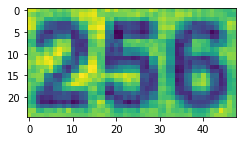

In [154]:

m=164
MIN=132
M=180
crop = crop_img[0:, MIN:]
punto = crop_img[0:, MIN-6:M-48]
crop2= crop_img[0:, MIN-6-(16*3):MIN-6]
plt.figure(figsize = (20,2))
plt.imshow(crop)
plt.imshow(punto)
plt.imshow(crop2)

In [155]:
cut_ims=[]
cut_im=[]
numWsize=16 #16 pixeles de ancho mide cada numero
seq3num=16*3
cutmin=crop_img.shape[1]-(seq3num)
cutmax=crop_img.shape[1]
i=0
for i in range(3):
  crop = crop_img[0:, cutmin:cutmax]
  cutmin=cutmin-seq3num-7
  cutmax=cutmax-seq3num-7
  print (cutmin, cutmax)
  cut_ims.append(crop) 
if(cutmax<18):
  crop = crop_img[0:, 0:cutmax+1]
  cut_im.append(crop)

77 125
22 70
-33 15


In [0]:
cut_ims=np.array(cut_ims)
cedula = []
cedula.append(cut_im[0])
cedula.append(cut_ims[2])
cedula.append(cut_ims[1])
cedula.append(cut_ims[0])

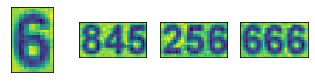

In [157]:
plt.figure(figsize=(7,7))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cedula[i])


In [158]:
cedula[0].shape[1]

16

In [0]:
nums=[]
numWsize=16 #16 pixeles de ancho mide cada numero
cutmin=0
cutmax=16
for i in range(4):
  cutmin=0  
  cutmax=16
  if(cedula[i].shape[1]<=numWsize):
    nums.append(cedula[i])
  else:
    j=0
    while(j<3):
      num = cedula[i][0:, cutmin:cutmax]
      cutmin=cutmin+numWsize
      cutmax=cutmax+numWsize
      nums.append(num)
      j=j+1
  


(25, 16)
(25, 16)
(25, 16)
(25, 16)
(25, 16)
(25, 16)
(25, 16)
(25, 16)
(25, 16)
(25, 16)


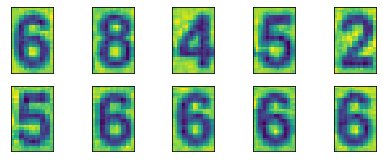

In [160]:
plt.figure(figsize=(7,7))
for i in range(len(nums)):
    print(nums[i].shape)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(nums[i])

In [161]:
nums[0].shape

(25, 16)

In [162]:
!pwd

/content/drive/My Drive/CVproject


In [163]:
import pandas as pd
mnist = pd.read_csv("data/mnist1.5k.csv.gz", header=None).values.astype(float)
print ("dimension de los datos originales", mnist.shape)
X=mnist[:,1:785]
y=mnist[:,0]
print ("dimension de las imagenes y las clases", X.shape, y.shape)
print ("luminosidad maxima", np.max(X))
print ("luminosidad minimo", np.min(X))

dimension de los datos originales (1500, 785)
dimension de las imagenes y las clases (1500, 784) (1500,)
luminosidad maxima 255.0
luminosidad minimo 0.0


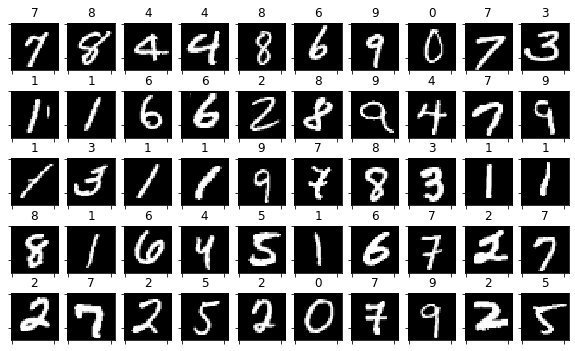

In [164]:
perm = np.random.permutation(range(X.shape[0]))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [165]:
from sklearn.model_selection import train_test_split

test_size = 0.2
#by defautl is 0.25 in test.

d_train, d_test, c_train, c_test = train_test_split(X, y, test_size=test_size)
print (d_train.shape, d_test.shape)
print (c_train.shape, c_test.shape)

(1200, 784) (300, 784)
(1200,) (300,)


In [166]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print ("dimensiones train", d_train.shape, c_train.shape)
print ("dimsensions test ", d_test.shape, c_test.shape)

g = SVC(kernel='poly')
g.fit(d_train, c_train)
print ("acierto en train", g.score(d_train, c_train))
print ("acierto en test ", g.score(d_test, c_test))

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

cm_train=confusion_matrix(c_train, predicciones_train)
cm_test = confusion_matrix(c_test, predicciones_test)
print ("matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)
print ("verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))

dimensiones train (1200, 784) (1200,)
dimsensions test  (300, 784) (300,)
acierto en train 0.9758333333333333
acierto en test  0.8633333333333333
matrix de confusión en train
 [[116   0   0   0   0   0   0   0   0   0]
 [  0 122   1   0   0   0   0   0   0   0]
 [  0   3 140   0   0   0   0   2   0   0]
 [  0   4   1  98   0   0   0   1   0   0]
 [  0   1   0   0 122   0   0   0   0   1]
 [  0   4   0   0   0 110   0   0   0   0]
 [  0   2   0   0   0   0 122   0   0   0]
 [  0   2   0   0   0   0   0 122   0   0]
 [  0   2   0   0   0   0   0   0 107   1]
 [  0   3   0   0   0   0   0   1   0 112]]
matrix de confusión en test
 [[30  0  0  0  0  1  3  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  0]
 [ 0  2 38  0  0  0  0  0  1  0]
 [ 1  3  0 12  0  4  0  0  1  0]
 [ 0  3  0  0 23  0  1  0  0  0]
 [ 0  1  0  1  0 22  0  0  0  0]
 [ 0  3  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  1  0  1 27  0  1]
 [ 0  5  0  0  0  0  0  0 24  2]
 [ 0  2  0  0  1  1  0  1  0 25]]
verifica número de imágenes en to

In [167]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

est1 = SVC()
est2 = RandomForestClassifier()
s = cross_val_score(est1, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy SCV %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s1 = cross_val_score(est2, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy SCV 0.914 (+/- 0.01625)
accuracy RF 0.914 (+/- 0.01625)


In [168]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", est1) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy SCV %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

p1 = Pipeline((("pca", PCA(n_components=50)), ("classifier", est2) ))
s1 = cross_val_score(p1, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy SCV 0.929 (+/- 0.01289)
accuracy RF 0.929 (+/- 0.01289)


In [0]:
#ajustamos el tamaño de las imagenes para pasarlas al clasificador
numsA = np.array(nums)
dim = (28,28)
numsR=[]
numsF=[]

for i in range(len(numsA)):
  rez = cv.resize(numsA[i], dim, interpolation = cv.INTER_AREA)
  #flatt_img = rez.reshape(28*28)
  numsR.append(rez)
  #numsF.append(flatt_img)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


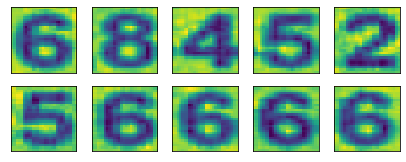

In [170]:
plt.figure(figsize=(7,7))
for i in range(len(numsR)):
    print(numsR[i].shape)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(numsR[i])

In [0]:
numsB = []
for i in range(len(numsR)):
    t, res = cv.threshold(numsR[i], 130, 255, cv.THRESH_BINARY_INV)
    numsB.append(res)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


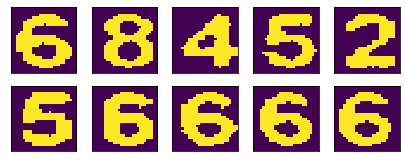

In [172]:
plt.figure(figsize=(7,7))
for i in range(len(numsB)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(numsB[i])
    print(numsB[i].shape)

In [0]:
def image_to_feature_vector(image, size=(28, 28)):
   return cv.resize(image, size).flatten()


In [0]:
for i in range(len(numsB)):
  data = numsB[i].flatten()
  numsF.append(data)



In [183]:
#Ahora probamos el clasificador con nuestros numeros
est2.fit(X,y)
predictions = est2.predict(numsF)
print( "predictions", predictions)

predictions [5. 0. 0. 5. 2. 5. 5. 8. 5. 5.]
